/tmp/ipykernel_172785/3767249851.py:35: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(x='Complexity', y='Time', hue='Tool', data=df,
/tmp/ipykernel_172785/3767249851.py:39: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(x='Complexity', y='Time', hue='Tool', data=df,
/tmp/ipykernel_172785/3767249851.py:39: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Complexity', y='Time', hue='Tool', data=df,
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because n

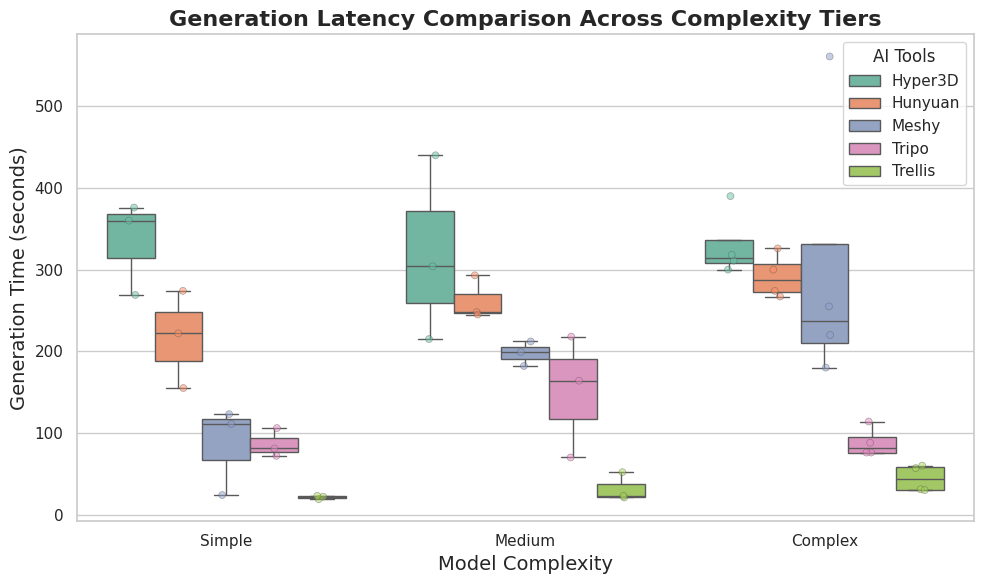

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. 构造数据
data = {
    'Tool': (['Hyper3D']*10 + ['Hunyuan']*10 + ['Meshy']*10 + ['Tripo']*10 + ['Trellis']*10),
    'Complexity': (['Simple']*3 + ['Medium']*3 + ['Complex']*4) * 5,
    'Time': [
        # Hyper3D
        269, 360, 376, 215, 440, 304, 311, 390, 300, 318,
        # Hunyuan
        155, 274, 222, 293, 248, 245, 300, 267, 326, 274,
        # Meshy
        24, 111, 123, 199, 212, 182, 561, 255, 220, 180,
        # Tripo
        81, 106, 72, 164, 70, 218, 76, 114, 76, 88,
        # Trellis
        19, 22, 23, 21, 23, 52, 57, 60, 31, 30
    ]
}

df = pd.DataFrame(data)

# 2. 设置绘图风格
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

fig, ax = plt.subplots(figsize=(10, 6))

# 3. 绘制箱线图
palette = sns.color_palette("Set2")
sns.boxplot(x='Complexity', y='Time', hue='Tool', data=df, 
            ax=ax, palette=palette, fliersize=0, width=0.8)

# 4. 叠加散点图展示原始数据点
sns.stripplot(x='Complexity', y='Time', hue='Tool', data=df, 
              dodge=True, marker='o', alpha=0.5, ax=ax, 
              palette=palette, edgecolor='gray', linewidth=0.5)

# 5. 图表修饰
ax.set_title('Generation Latency Comparison Across Complexity Tiers', fontsize=16, fontweight='bold')
ax.set_xlabel('Model Complexity', fontsize=14)
ax.set_ylabel('Generation Time (seconds)', fontsize=14)
ax.legend(title='AI Tool', bbox_to_anchor=(1.05, 1), loc='upper left')

# 移除冗余图例（stripplot会生成多余图例）
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:5], labels[0:5], title='AI Tools', loc='upper right')

plt.tight_layout()
plt.savefig('generation_time_eval.png', dpi=300)
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

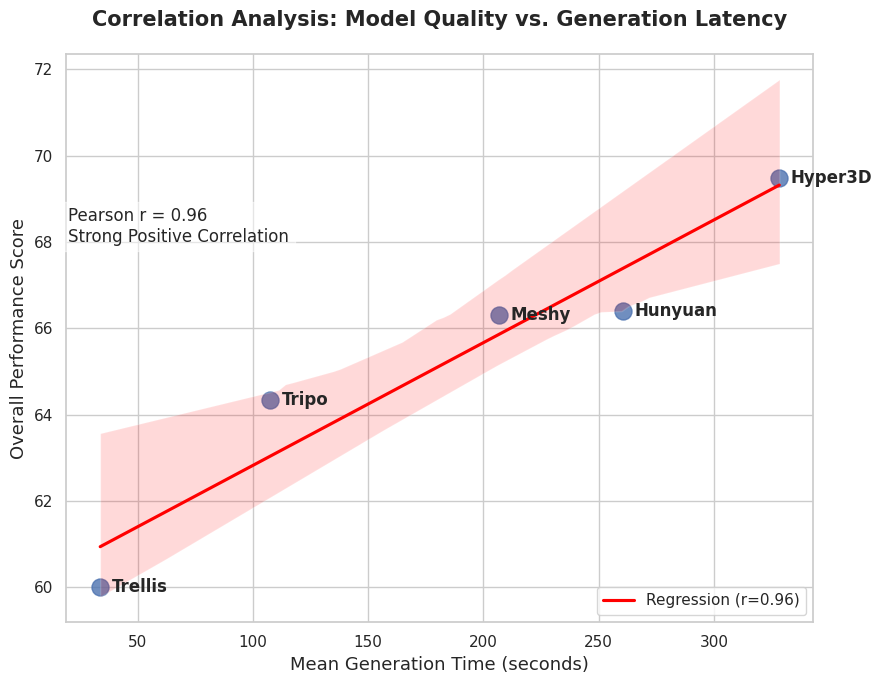

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# 1. 整理数据
# 平均时间是根据你之前提供的数据计算的平均值
tools_data = {
    'Tool': ['Hyper3D', 'Hunyuan', 'Meshy', 'Tripo', 'Trellis'],
    'Overall_Score': [69.49, 66.40, 66.30, 64.35, 60.00],
    'Mean_Time': [328.3, 260.4, 206.7, 107.5, 33.8] # 之前的平均耗时
}

df = pd.DataFrame(tools_data)

# 2. 计算相关系数 (Pearson correlation)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Mean_Time'], df['Overall_Score'])

# 3. 设置学术风格
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

plt.figure(figsize=(9, 7))

# 绘制回归线和散点
ax = sns.regplot(x='Mean_Time', y='Overall_Score', data=df, 
                 scatter_kws={'s': 150, 'alpha': 0.8}, 
                 line_kws={'color': 'red', 'label': f'Regression (r={r_value:.2f})'})

# 为每个点添加标签
for i in range(df.shape[0]):
    plt.text(df.Mean_Time[i]+5, df.Overall_Score[i], df.Tool[i], 
             fontsize=12, fontweight='bold', va='center')

# 4. 图表优化
plt.title('Correlation Analysis: Model Quality vs. Generation Latency', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Mean Generation Time (seconds)', fontsize=13)
plt.ylabel('Overall Performance Score', fontsize=13)
plt.legend(loc='lower right')

# 添加统计学说明文字
plt.text(20, 68, f'Pearson r = {r_value:.2f}\nStrong Positive Correlation', 
         bbox=dict(facecolor='white', alpha=0.5), fontsize=12)

plt.tight_layout()
plt.savefig('correlation_quality_time.png', dpi=300)
plt.show()

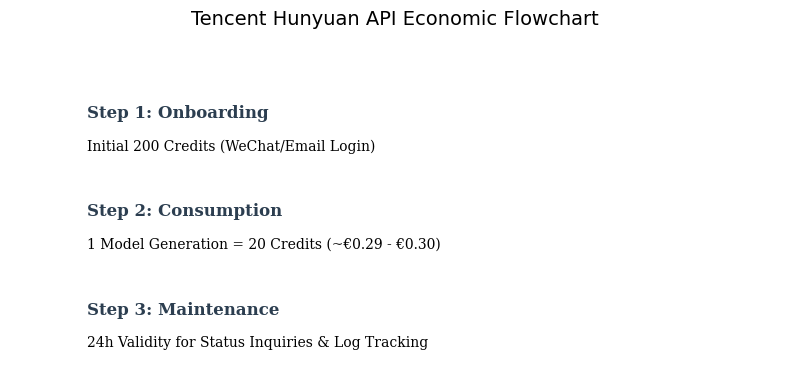

In [1]:
import matplotlib.pyplot as plt

# Data for API Cost Logic
labels = ['Free Initial Gift', 'Standard Job Cost', 'Unit Credit Price']
values = [200, 20, 0.015]  # Credits, Credits, EUR

fig, ax = plt.subplots(figsize=(8, 4))
plt.rcParams['font.family'] = 'serif'

# Create a horizontal summary of the cost pipeline
ax.text(0.1, 0.8, "Step 1: Onboarding", fontsize=12, fontweight='bold', color='#2c3e50')
ax.text(0.1, 0.7, "Initial 200 Credits (WeChat/Email Login)", fontsize=10)

ax.text(0.1, 0.5, "Step 2: Consumption", fontsize=12, fontweight='bold', color='#2c3e50')
ax.text(0.1, 0.4, "1 Model Generation = 20 Credits (~€0.29 - €0.30)", fontsize=10)

ax.text(0.1, 0.2, "Step 3: Maintenance", fontsize=12, fontweight='bold', color='#2c3e50')
ax.text(0.1, 0.1, "24h Validity for Status Inquiries & Log Tracking", fontsize=10)

# Remove axes for a "Card" style look
ax.axis('off')
plt.title("Tencent Hunyuan API Economic Flowchart", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('hunyuan_api_logic.png', dpi=300)
plt.show()